# PROJECT 5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
# Accessing the Stocks Data
df = pd.read_csv('data_stocks.csv')

df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


## Problem Statement:

## Pick up the following stocks and generate forecasts accordingly

## 1. NASDAQ.AAPL

In [3]:
# Isolating the stock from the given data 
aapl = df[['DATE','NASDAQ.AAPL']]


In [4]:
# Setting the date as index
aapl = aapl.set_index('DATE')
aapl.head()

,NASDAQ.AAPL
DATE,
1491226200,143.6800
1491226260,143.7000
1491226320,143.6901
1491226380,143.6400
1491226440,143.6600


In [5]:
# Converting the Int64Index to DatetimeIndex
aapl.index =  pd.to_datetime(pd.Series(aapl.index))
aapl.head()

,NASDAQ.AAPL
DATE,
1970-01-01 00:00:01.491226200,143.6800
1970-01-01 00:00:01.491226260,143.7000
1970-01-01 00:00:01.491226320,143.6901
1970-01-01 00:00:01.491226380,143.6400
1970-01-01 00:00:01.491226440,143.6600


In [6]:
# To remove error: 'RangeIndex' object has no attribute 'inferred_freq'
aapl.index = pd.DatetimeIndex(freq='d',start=0,periods=41266)
aapl.head()

,NASDAQ.AAPL
1970-01-01,143.6800
1970-01-02,143.7000
1970-01-03,143.6901
1970-01-04,143.6400
1970-01-05,143.6600


In [7]:
# The 'MS' string groups the data in buckets by start of the month
y = aapl['NASDAQ.AAPL'].resample('MS').mean()
y['2082':]

2082-01-01    163.886945
2082-02-01    163.677739
2082-03-01    163.844784
2082-04-01    163.844670
2082-05-01    164.336229
2082-06-01    164.246193
2082-07-01    164.050113
2082-08-01    163.901335
2082-09-01    163.835973
2082-10-01    164.045758
2082-11-01    164.059737
2082-12-01    164.168058
Freq: MS, Name: NASDAQ.AAPL, dtype: float64

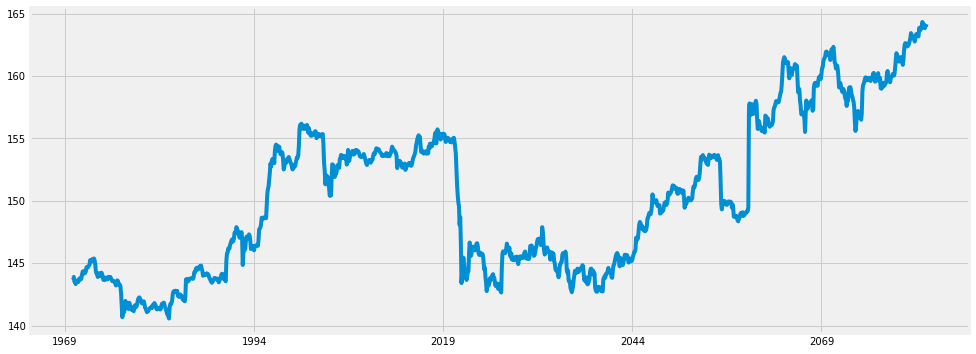

In [8]:
# Visualising the Stocks Data of AAPL
y.plot(figsize=(15, 6))
plt.show()

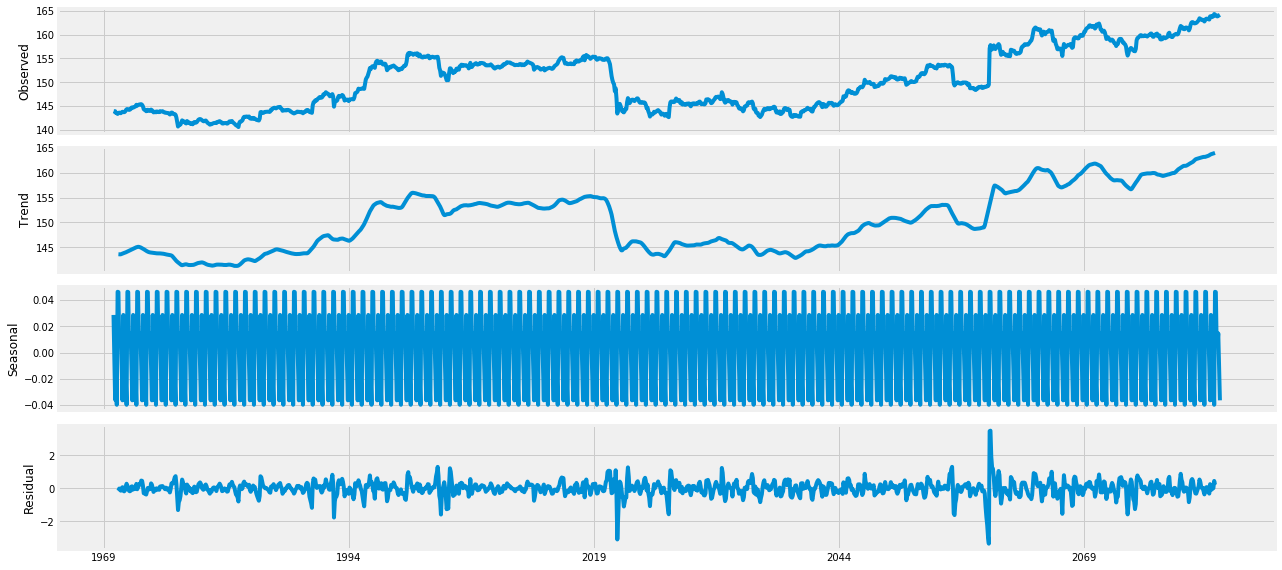

In [9]:
# Decomposing our time series into three distinct components: trend, seasonality, and noise
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [10]:
# The plot above clearly shows that the stocks data is unstable, along with its obvious seasonality.
# We can observe that the given time series is not stationary as it exhibits seasonality
# Applying Autoregressive Integrated Moving Average (ARIMA) Model on this data
# ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account 
# for seasonality, trend, and noise in data

import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [11]:
# We need to use a “grid search” to find the optimal set of parameters that yields the best performance for our model
# The AIC measures how well a model fits the data while taking into account the overall complexity of the model. 
# A model that fits the data very well while using lots of features will be assigned a larger AIC score than a model that uses
# fewer features to achieve the same goodness-of-fit. Therefore, we are interested in finding the model that yields the lowest AIC value.
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:17436.77283726426
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:15494.838146738539
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:5371.932871120307
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:5335.597031144862
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:5363.937900829356
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:5362.9130155057
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:5338.904029079651
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:5337.4697602713695
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:15557.830425669998
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:13633.66581479137
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3855.2213189244303
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:3827.7403635906776
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3851.8452542213427
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:5449.644717969784
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:3834.8145471603348
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:3826.970125256919
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1457.5637324320833
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1455.4367652798383
ARI

In [12]:
# The AIC value is the least for ARIMA (1,1,1)x(1,0,1,12). Hence we use these parameters to fit our model

mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2457      0.069     -3.579      0.000      -0.380      -0.111
ma.L1          0.5028      0.065      7.727      0.000       0.375       0.630
ar.S.L12      -0.0415      1.104     -0.038      0.970      -2.204       2.121
ma.S.L12       0.0221      1.105      0.020      0.984      -2.143       2.188
sigma2         0.1615      0.001    152.387      0.000       0.159       0.164


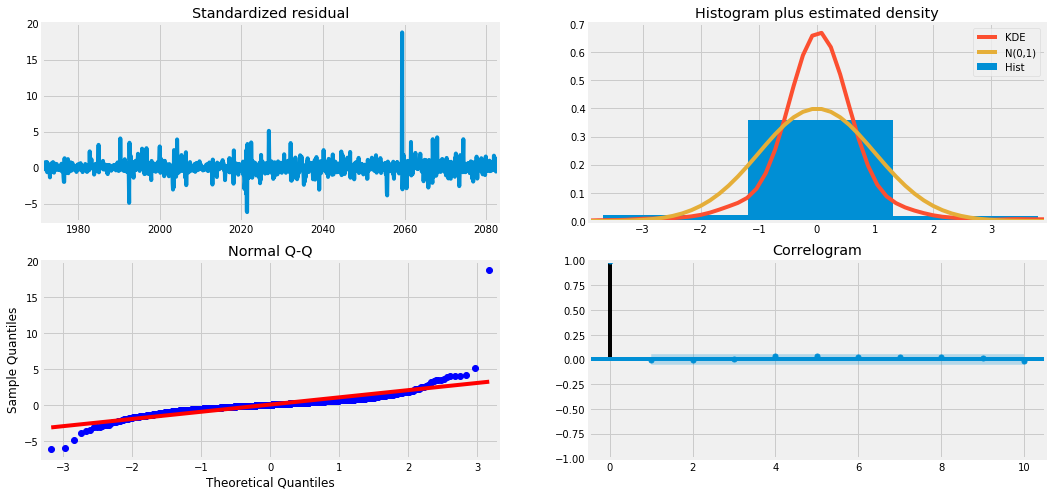

In [13]:
# Visualising the plot diagnostics
results.plot_diagnostics(figsize=(16, 8))
plt.show()

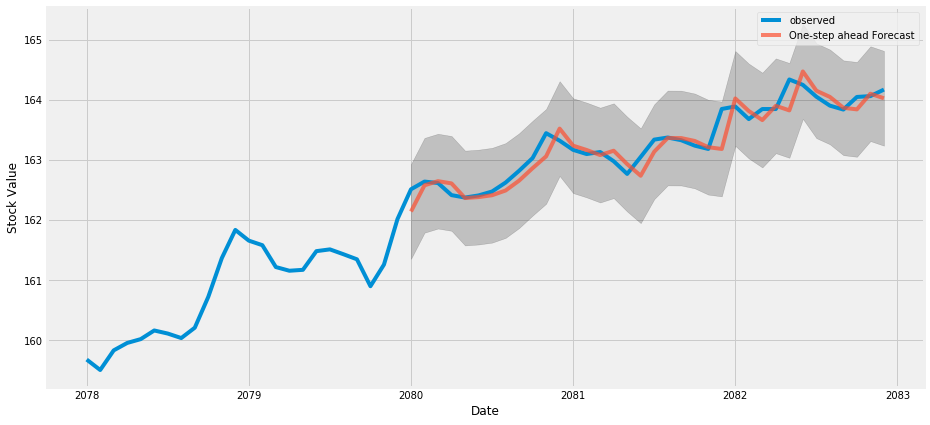

In [14]:
# Using one-step-ahead forecast to predict the stock values
pred = results.get_prediction(start=pd.to_datetime('2080-01-01'), dynamic=False)

# Determining the confidence interval
pred_ci = pred.conf_int()

# Visualisng the original and the forecasted value of the stock
ax = y['2078':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Stock Value')
plt.legend()
plt.show()


In [15]:
# Determining the MSE of the prediction
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.04


In [16]:
# Determining the RMSE of the prediction
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.21


## 2. NASDAQ.ADP

In [17]:
# Isolating the stock from the given data 
adp = df[['DATE','NASDAQ.ADP']]

In [18]:
# Setting the date as index
adp = adp.set_index('DATE')
adp.head()

,NASDAQ.ADP
DATE,
1491226200,102.2300
1491226260,102.1400
1491226320,102.2125
1491226380,102.1400
1491226440,102.0600


In [19]:
# Converting the Int64Index to DatetimeIndex
adp.index =  pd.to_datetime(pd.Series(adp.index))
adp.head()

,NASDAQ.ADP
DATE,
1970-01-01 00:00:01.491226200,102.2300
1970-01-01 00:00:01.491226260,102.1400
1970-01-01 00:00:01.491226320,102.2125
1970-01-01 00:00:01.491226380,102.1400
1970-01-01 00:00:01.491226440,102.0600


In [20]:
# To remove error: 'RangeIndex' object has no attribute 'inferred_freq'
adp.index = pd.DatetimeIndex(freq='d',start=0,periods=41266)
adp.head()

,NASDAQ.ADP
1970-01-01,102.2300
1970-01-02,102.1400
1970-01-03,102.2125
1970-01-04,102.1400
1970-01-05,102.0600


In [21]:
# The 'MS' string groups the data in buckets by start of the month
y = adp['NASDAQ.ADP'].resample('MS').mean()
y['2082':]

2082-01-01    106.513026
2082-02-01    106.214393
2082-03-01    106.292571
2082-04-01    106.470197
2082-05-01    106.647594
2082-06-01    106.649333
2082-07-01    106.568094
2082-08-01    106.530548
2082-09-01    106.575780
2082-10-01    106.700532
2082-11-01    106.474093
2082-12-01    106.621458
Freq: MS, Name: NASDAQ.ADP, dtype: float64

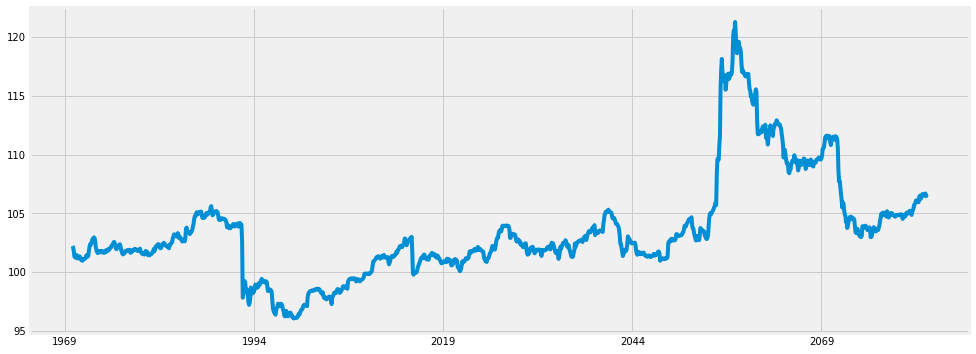

In [22]:
# Visualising the Stocks Data of ADP
y.plot(figsize=(15, 6))
plt.show()

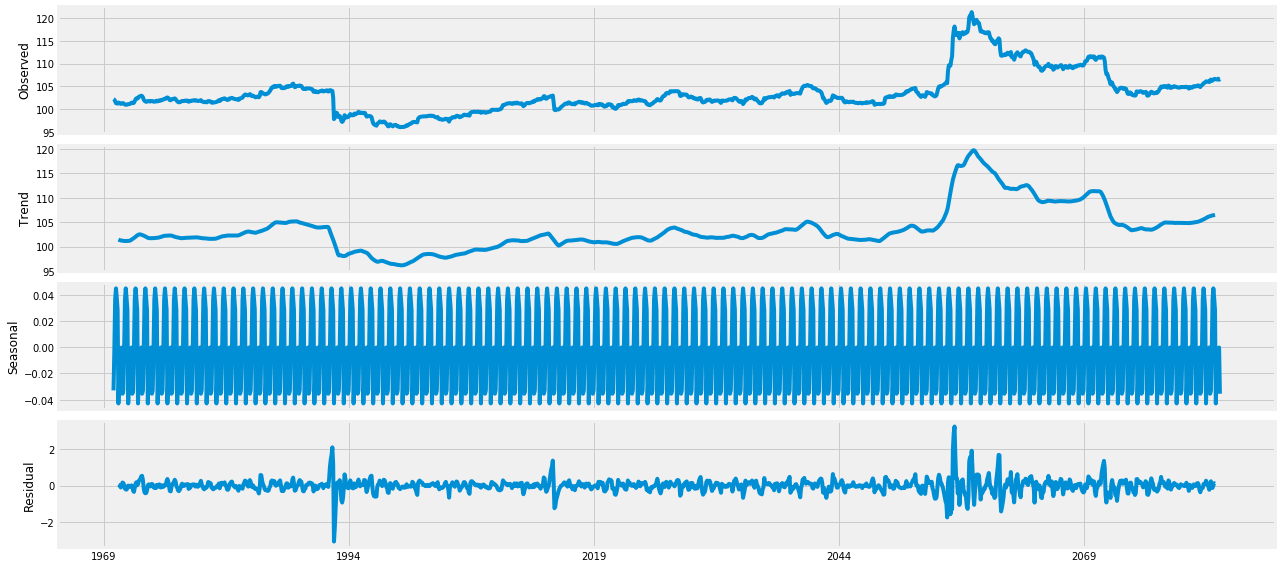

In [23]:
# Decomposing our time series into three distinct components: trend, seasonality, and noise
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [24]:
# The plot above clearly shows that the stocks data is unstable, along with its obvious seasonality.
# We can observe that the given time series is not stationary as it exhibits seasonality
# Applying Autoregressive Integrated Moving Average (ARIMA) Model on this data
# ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account 
# for seasonality, trend, and noise in data

import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [25]:
# We need to use a “grid search” to find the optimal set of parameters that yields the best performance for our model

import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:16422.562452592792
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:14490.428479453058
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:5010.342155176515
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4945.518904510399
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:5014.806960332133
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:4980.663879876176
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4944.294831504052
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:4943.2207121792535
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:14544.377509932183
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:12631.26456059168
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3456.970217092399
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:3421.7093687968845
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3463.4787114233195
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3445.996106853083
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:3425.337817924344
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:3422.577398555497
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:829.3059015005521
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:831.6567020254563
ARIM

In [26]:
# The lowest AIC value is for ARIMA(1, 1, 0)x(0, 0, 0, 12)12. Hence we use this for fitting our model.
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 0),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3067      0.009     34.470      0.000       0.289       0.324
sigma2         0.0977      0.001    126.440      0.000       0.096       0.099


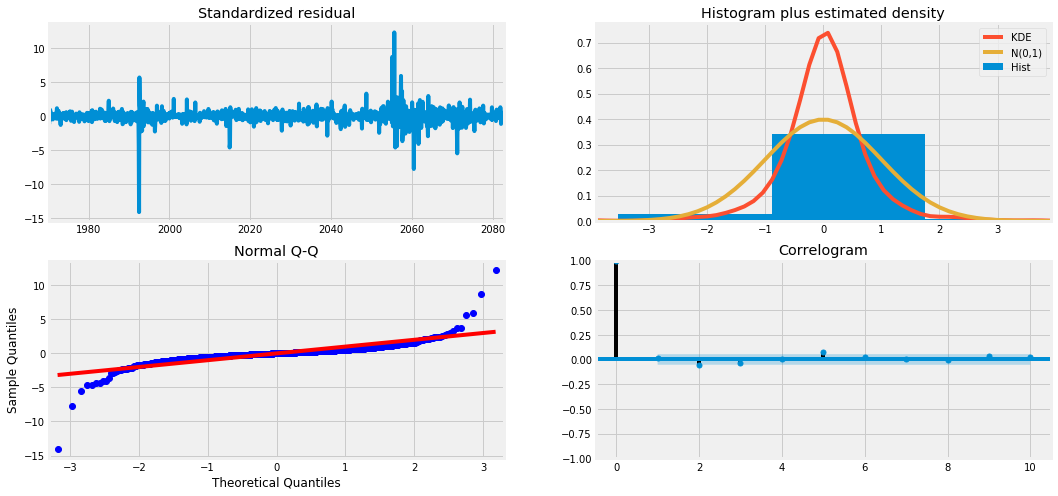

In [27]:
# Visualising the plot diagnostics
results.plot_diagnostics(figsize=(16, 8))
plt.show()

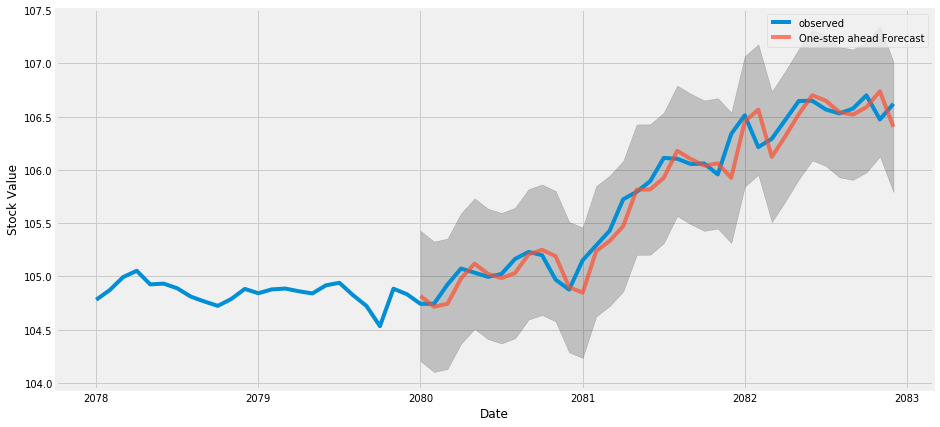

In [28]:
# Now, we use One-Step ahead forecast
pred = results.get_prediction(start=pd.to_datetime('2080-01-01'), dynamic=False)

# Determining the Confidence-intervals
pred_ci = pred.conf_int()

# Visualising the actual and the predicted values
ax = y['2078':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Stock Value')
plt.legend()
plt.show()

In [29]:
# Finding the MSE of the prediction
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.02


In [30]:
# Finding the RMSE of the prediction
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.15


## 3. NASDAQ.CBOE

In [31]:
# Isolating the stock from the given data 
cboe = df[['DATE','NASDAQ.CBOE']]

In [32]:
# Setting the date as index
cboe = cboe.set_index('DATE')
cboe.head()

,NASDAQ.CBOE
DATE,
1491226200,81.03
1491226260,81.21
1491226320,81.21
1491226380,81.13
1491226440,81.12


In [33]:
# Converting the Int64Index to DatetimeIndex
cboe.index =  pd.to_datetime(pd.Series(cboe.index))
cboe.head()

,NASDAQ.CBOE
DATE,
1970-01-01 00:00:01.491226200,81.03
1970-01-01 00:00:01.491226260,81.21
1970-01-01 00:00:01.491226320,81.21
1970-01-01 00:00:01.491226380,81.13
1970-01-01 00:00:01.491226440,81.12


In [34]:
# To remove error: 'RangeIndex' object has no attribute 'inferred_freq'
cboe.index = pd.DatetimeIndex(freq='d',start=0,periods=41266)
cboe.head()

,NASDAQ.CBOE
1970-01-01,81.03
1970-01-02,81.21
1970-01-03,81.21
1970-01-04,81.13
1970-01-05,81.12


In [35]:
# The 'MS' string groups the data in buckets by start of the month
y = cboe['NASDAQ.CBOE'].resample('MS').mean()
y['2082':]

2082-01-01    100.914648
2082-02-01    100.978571
2082-03-01    101.063065
2082-04-01    100.867667
2082-05-01    100.888387
2082-06-01    101.041167
2082-07-01    100.898639
2082-08-01    100.720329
2082-09-01    100.857163
2082-10-01    101.096935
2082-11-01    101.089003
2082-12-01    100.923846
Freq: MS, Name: NASDAQ.CBOE, dtype: float64

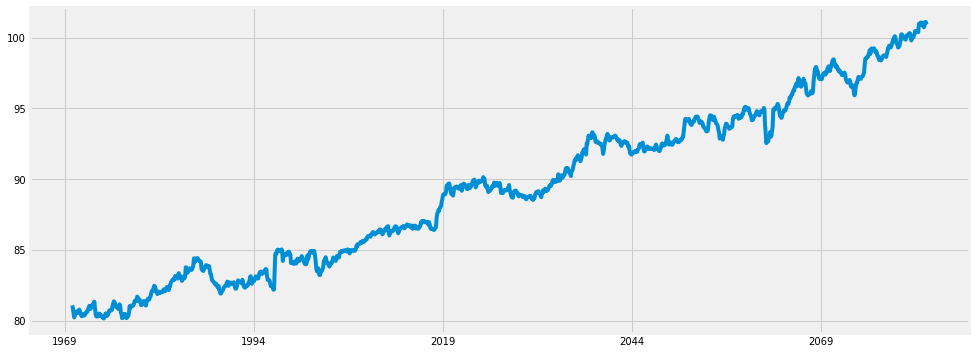

In [36]:
# Visualising the Stocks Data of CBOE
y.plot(figsize=(15, 6))
plt.show()

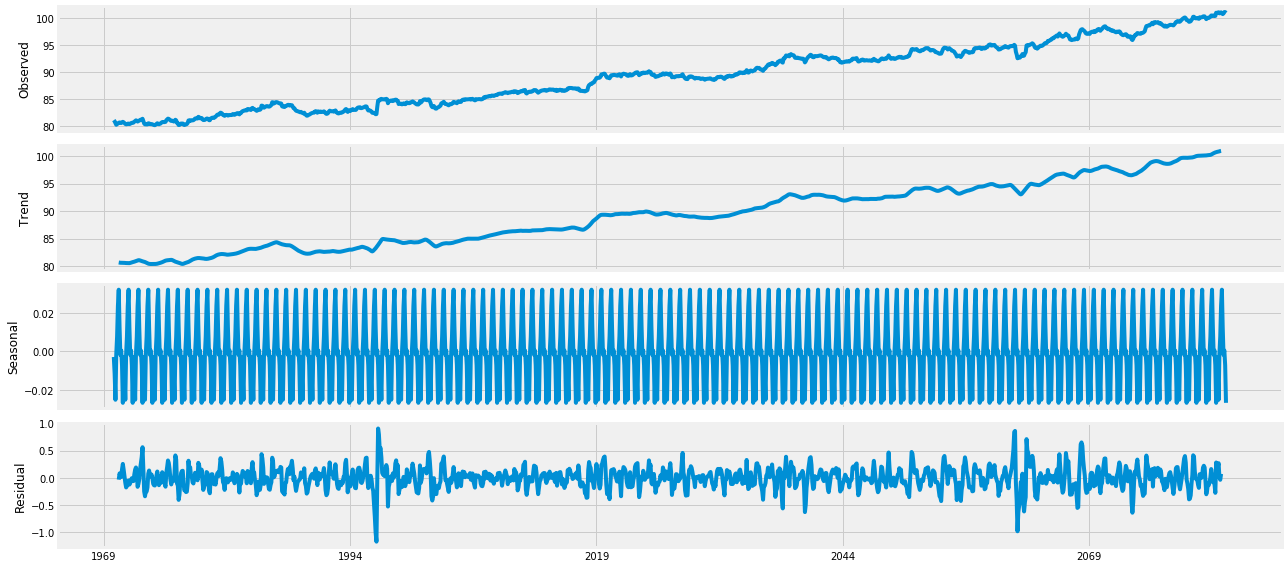

In [37]:
# Decomposing our time series into three distinct components: trend, seasonality, and noise
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [38]:
# The plot above clearly shows that the stocks data is unstable, along with its obvious seasonality.
# We can observe that the given time series is not stationary as it exhibits seasonality
# Applying Autoregressive Integrated Moving Average (ARIMA) Model on this data
# ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account 
# for seasonality, trend, and noise in data

import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [39]:
# We need to use a “grid search” to find the optimal set of parameters that yields the best performance for our model

import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:16027.245328561505
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:14099.567465189055
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2842.881561568184
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2795.246278645902
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2752.1191652768935
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2654.35833482742
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2789.6838844152126
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2787.1066734106607
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:14148.986994776578
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:12239.311835745975
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1369.8529459143788
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1319.2921171460712
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2792.407310464142
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2937.25683166033
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1316.2979963877515
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1316.6465459706928
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-1008.5977319982347
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-1008.05577654662

In [40]:
# The lowest AIC value is for ARIMA(1, 1, 1)x(1, 1, 1, 12)12. Hence we use this for fitting our model.
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1670      0.076      2.206      0.027       0.019       0.315
ma.L1          0.1060      0.078      1.359      0.174      -0.047       0.259
ar.S.L12      -0.0909      0.023     -4.014      0.000      -0.135      -0.046
ma.S.L12      -1.0169      0.012    -84.462      0.000      -1.040      -0.993
sigma2         0.0247      0.001     34.508      0.000       0.023       0.026


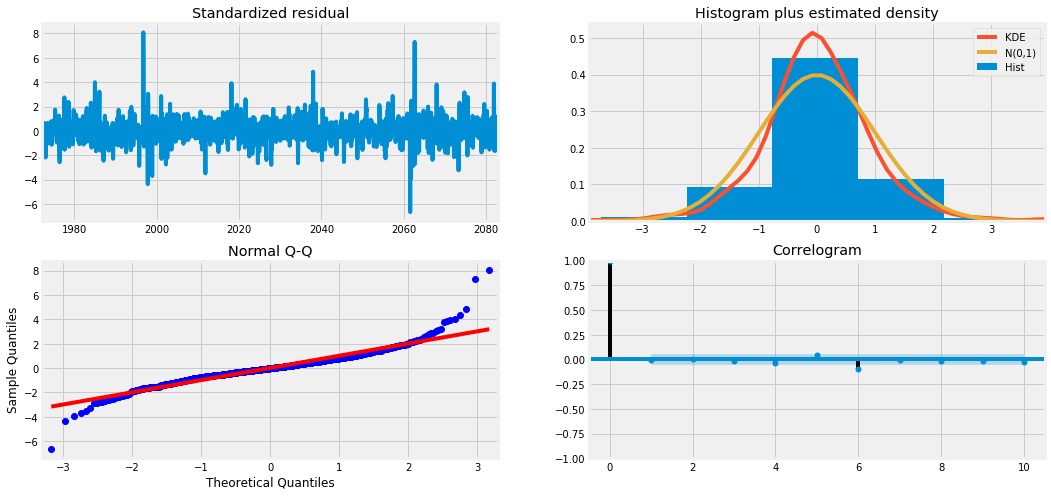

In [41]:
# Visualising the plot diagnostics
results.plot_diagnostics(figsize=(16, 8))
plt.show()

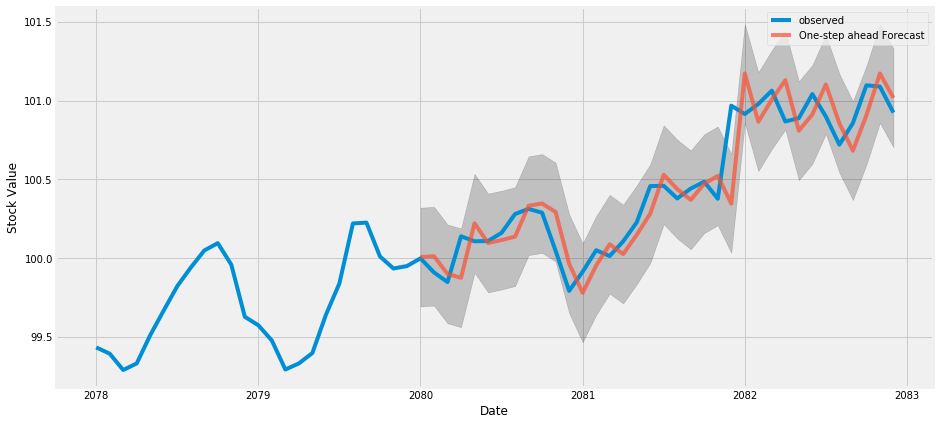

In [42]:
# Now, we use One-Step ahead forecast
pred = results.get_prediction(start=pd.to_datetime('2080-01-01'), dynamic=False)

# Determining the Confidence-intervals
pred_ci = pred.conf_int()

# Visualising the actual and the predicted values
ax = y['2078':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Stock Value')
plt.legend()
plt.show()

In [43]:
# Finding the MSE of the prediction
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.03


In [44]:
# Finding the RMSE of the prediction
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.17


## 4. NASDAQ.CSCO

In [45]:
# Isolating the stock from the given data 
csco = df[['DATE','NASDAQ.CSCO']]

In [46]:
# Setting the date as index
csco = csco.set_index('DATE')
csco.head()

,NASDAQ.CSCO
DATE,
1491226200,33.7400
1491226260,33.8800
1491226320,33.9000
1491226380,33.8499
1491226440,33.8400


In [47]:
# Converting the Int64Index to DatetimeIndex
csco.index =  pd.to_datetime(pd.Series(csco.index))
csco.head()

,NASDAQ.CSCO
DATE,
1970-01-01 00:00:01.491226200,33.7400
1970-01-01 00:00:01.491226260,33.8800
1970-01-01 00:00:01.491226320,33.9000
1970-01-01 00:00:01.491226380,33.8499
1970-01-01 00:00:01.491226440,33.8400


In [48]:
# To remove error: 'RangeIndex' object has no attribute 'inferred_freq'
csco.index = pd.DatetimeIndex(freq='d',start=0,periods=41266)
csco.head()

,NASDAQ.CSCO
1970-01-01,33.7400
1970-01-02,33.8800
1970-01-03,33.9000
1970-01-04,33.8499
1970-01-05,33.8400


In [49]:
# The 'MS' string groups the data in buckets by start of the month
y = csco['NASDAQ.CSCO'].resample('MS').mean()
y['2082':]

2082-01-01    32.177739
2082-02-01    32.179429
2082-03-01    32.221081
2082-04-01    32.271977
2082-05-01    32.270371
2082-06-01    32.273467
2082-07-01    32.259058
2082-08-01    32.249287
2082-09-01    32.263447
2082-10-01    32.260497
2082-11-01    32.281667
2082-12-01    32.237079
Freq: MS, Name: NASDAQ.CSCO, dtype: float64

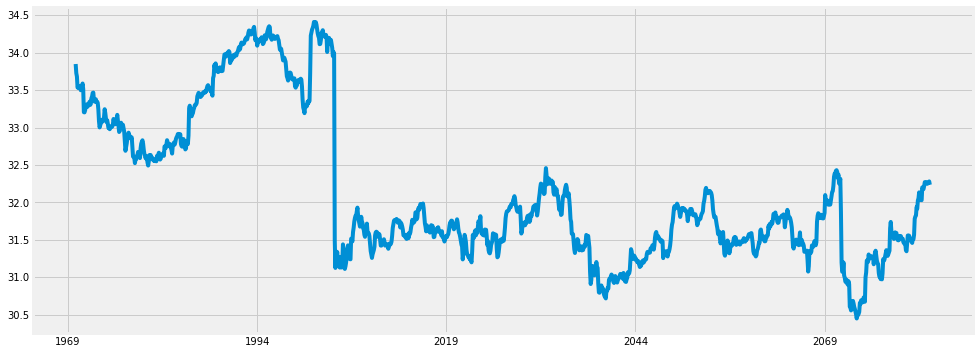

In [50]:
# Visualising the Stocks Data of CSCO
y.plot(figsize=(15, 6))
plt.show()

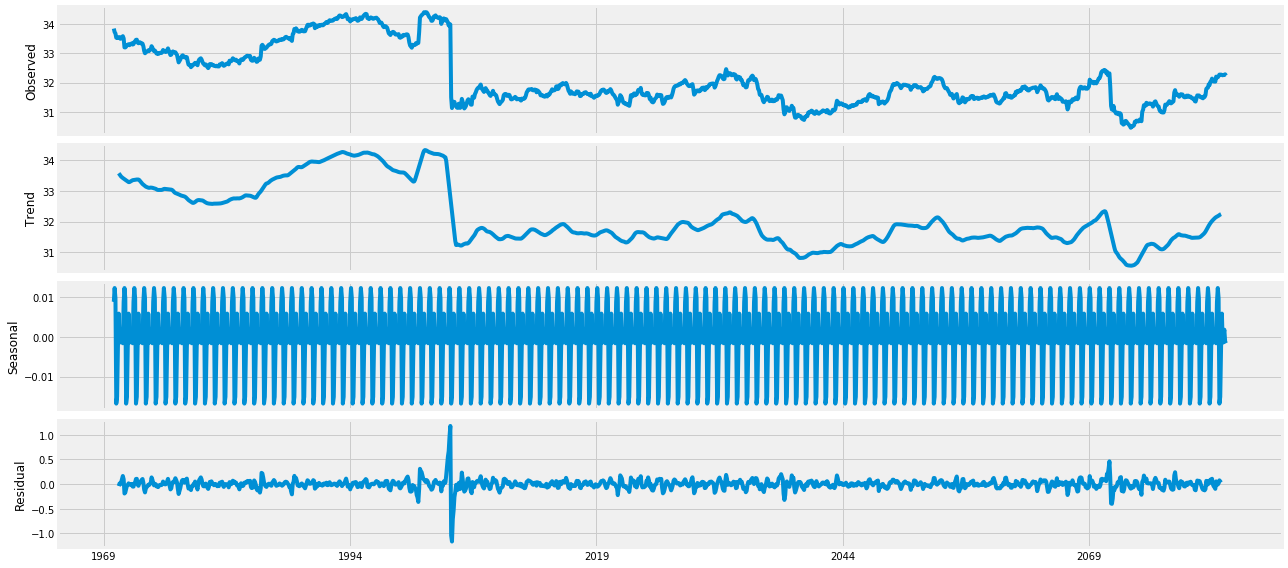

In [51]:
# Decomposing our time series into three distinct components: trend, seasonality, and noise
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [52]:
# The plot above clearly shows that the stocks data is unstable, along with its obvious seasonality.
# We can observe that the given time series is not stationary as it exhibits seasonality
# Applying Autoregressive Integrated Moving Average (ARIMA) Model on this data
# ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account 
# for seasonality, trend, and noise in data

import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [53]:
# We need to use a “grid search” to find the optimal set of parameters that yields the best performance for our model

import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:13252.411718847306
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:11349.444322215597
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1276.5030655487312
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1271.7596665391509
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1277.2845921640862
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1278.4861372013384
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1271.9956440246403
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1272.8904573691514
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:11378.103017844116
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:9493.647930761552
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-206.47592600940527
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-202.37717174734644
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1312.2031843582029
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-186.2786878715757
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-200.80095187077757
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-226.33201502328097
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-2500.963356326285
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-2479.36

In [54]:
# The lowest AIC value is for ARIMA(1, 0, 1)x(0, 0, 0, 12)12. Hence we use this for fitting our model.
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 0, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   7127.695      0.000       1.000       1.000
ma.L1          0.2225      0.015     14.790      0.000       0.193       0.252
sigma2         0.0088   3.75e-05    234.176      0.000       0.009       0.009


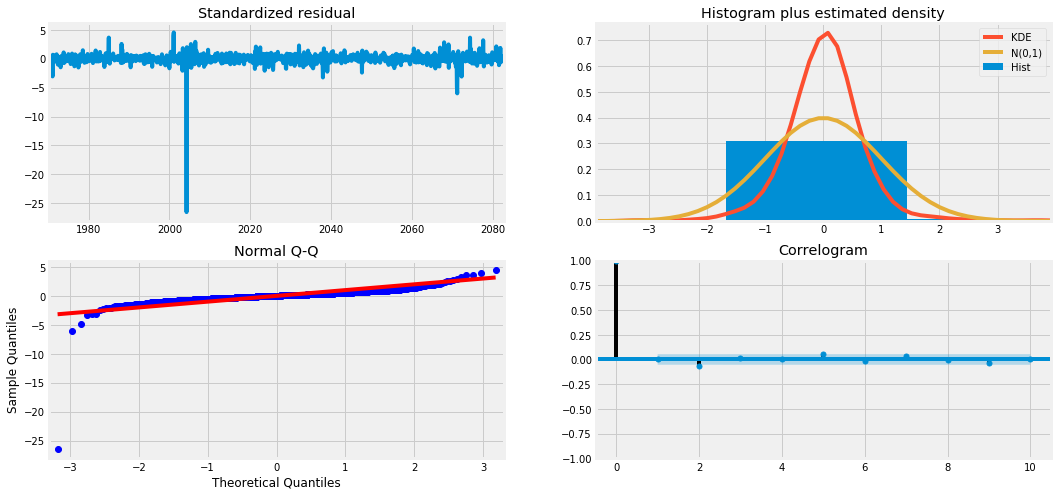

In [55]:
# Visualising the plot diagnostics
results.plot_diagnostics(figsize=(16, 8))
plt.show()

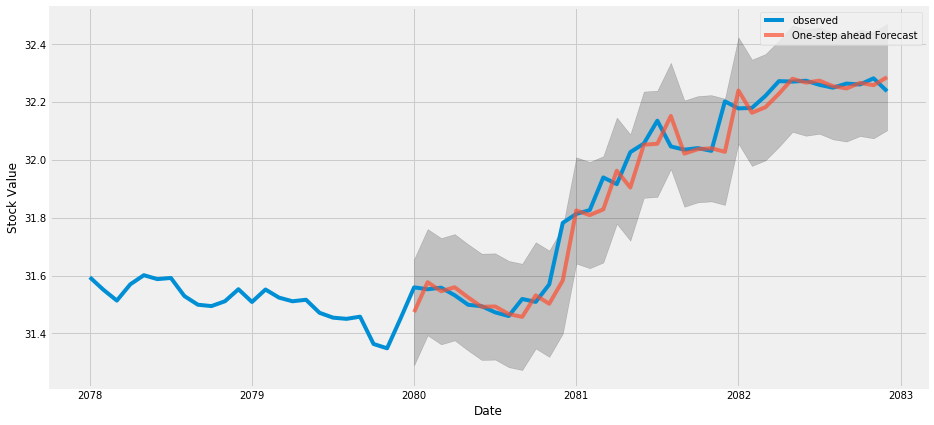

In [56]:
# Now, we use One-Step ahead forecast
pred = results.get_prediction(start=pd.to_datetime('2080-01-01'), dynamic=False)

# Determining the Confidence-intervals
pred_ci = pred.conf_int()

# Visualising the actual and the predicted values
ax = y['2078':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Stock Value')
plt.legend()
plt.show()

In [57]:
# Finding the MSE of the prediction
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.0


In [58]:
# Finding the RMSE of the prediction
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.06


## 5. NASDAQ.EBAY

In [59]:
# Isolating the stock from the given data 
ebay = df[['DATE','NASDAQ.EBAY']]

In [60]:
# Setting the date as index
ebay = ebay.set_index('DATE')
ebay.head()

,NASDAQ.EBAY
DATE,
1491226200,33.3975
1491226260,33.3950
1491226320,33.4100
1491226380,33.3350
1491226440,33.4000


In [61]:
# Converting the Int64Index to DatetimeIndex
ebay.index =  pd.to_datetime(pd.Series(ebay.index))
ebay.head()

,NASDAQ.EBAY
DATE,
1970-01-01 00:00:01.491226200,33.3975
1970-01-01 00:00:01.491226260,33.3950
1970-01-01 00:00:01.491226320,33.4100
1970-01-01 00:00:01.491226380,33.3350
1970-01-01 00:00:01.491226440,33.4000


In [62]:
# To remove error: 'RangeIndex' object has no attribute 'inferred_freq'
ebay.index = pd.DatetimeIndex(freq='d',start=0,periods=41266)
ebay.head()

,NASDAQ.EBAY
1970-01-01,33.3975
1970-01-02,33.3950
1970-01-03,33.4100
1970-01-04,33.3350
1970-01-05,33.4000


In [63]:
# The 'MS' string groups the data in buckets by start of the month
y = ebay['NASDAQ.EBAY'].resample('MS').mean()
y['2082':]

2082-01-01    36.084481
2082-02-01    36.085311
2082-03-01    36.136877
2082-04-01    36.152147
2082-05-01    36.198726
2082-06-01    36.244830
2082-07-01    36.167339
2082-08-01    36.142074
2082-09-01    36.138810
2082-10-01    36.188206
2082-11-01    36.160780
2082-12-01    36.203333
Freq: MS, Name: NASDAQ.EBAY, dtype: float64

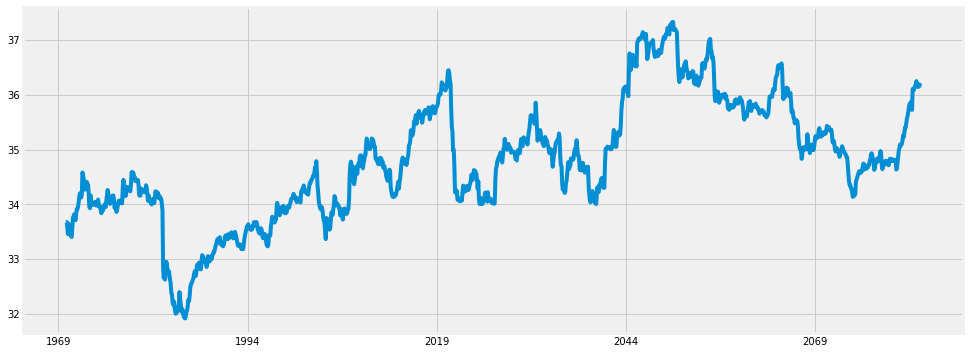

In [64]:
# Visualising the Stocks Data of EBAY
y.plot(figsize=(15, 6))
plt.show()

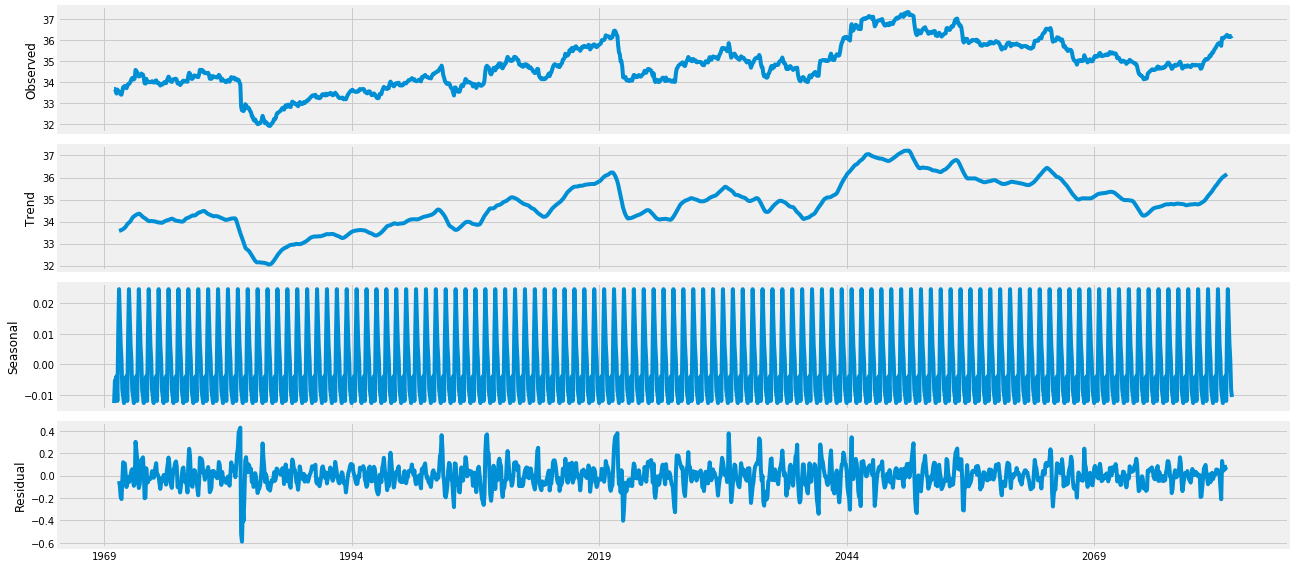

In [65]:
# Decomposing our time series into three distinct components: trend, seasonality, and noise
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [66]:
# The plot above clearly shows that the stocks data is unstable, along with its obvious seasonality.
# We can observe that the given time series is not stationary as it exhibits seasonality
# Applying Autoregressive Integrated Moving Average (ARIMA) Model on this data
# ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account 
# for seasonality, trend, and noise in data

import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [67]:
# We need to use a “grid search” to find the optimal set of parameters that yields the best performance for our model

import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:13467.783997502618
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:11559.521338191364
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1464.5215853149807
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1443.923609696314
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1463.3726482635848
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1456.5937870843882
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1445.8559558405136
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1447.1095898703625
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:11591.710565081958
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:9701.150543367661
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-53.526581798510534
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-55.10525467242682
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-54.7797575834752
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-53.82614410520816
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-52.620214818924154
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-51.24476205536778
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-2500.6218444084543
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-2480.57407

In [68]:
# The lowest AIC value is for ARIMA(0, 1, 1)x(0, 0, 0, 12)12. Hence we use this for fitting our model.
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2640      0.021     12.655      0.000       0.223       0.305
sigma2         0.0087      0.000     75.752      0.000       0.008       0.009


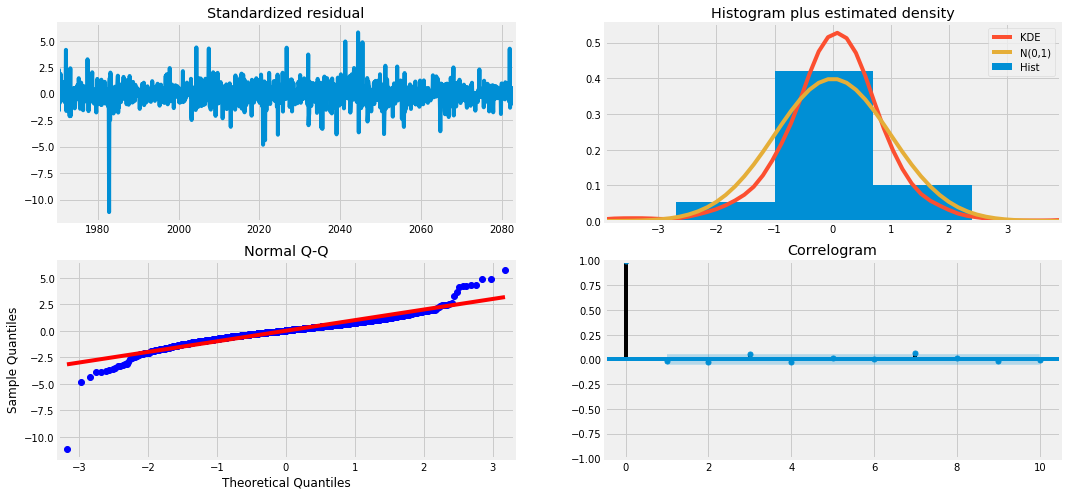

In [69]:
# Visualising the plot diagnostics
results.plot_diagnostics(figsize=(16, 8))
plt.show()

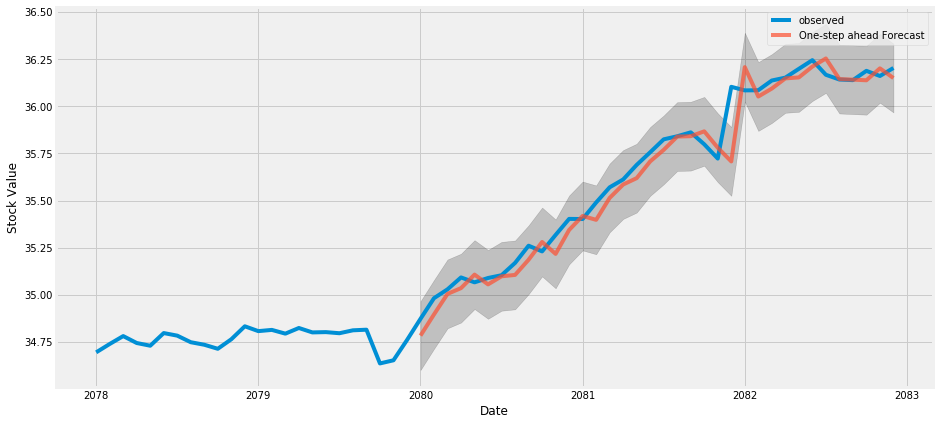

In [70]:
# Now, we use One-Step ahead forecast
pred = results.get_prediction(start=pd.to_datetime('2080-01-01'), dynamic=False)

# Determining the Confidence-intervals
pred_ci = pred.conf_int()

# Visualising the actual and the predicted values
ax = y['2078':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Stock Value')
plt.legend()
plt.show()

In [71]:
# Finding the MSE of the prediction
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.01


In [72]:
# Finding the RMSE of the prediction
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.09
